# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
# A wrapper for multiple APIs with a pandas interface
!pip install pandas-datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
plt.style.use('seaborn-whitegrid')
import datetime

import pandas_datareader

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
#import dataproject


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [3]:
# Need first to encode dates in a python friendly to specify the length of the desired time period. 
# Use the datetime module - it is the general way to handle dates in python. 
start = datetime.datetime(2012,1,1)
end = datetime.datetime.now()
timespan = end - start # We can investigate the precise time span by just subtracting to time variables.
print('total number of days:', timespan.days) # The timespan object has a days attribute.

total number of days: 3747


In [37]:
# Call the FRED api using pandas_datareader 
gdp = pandas_datareader.data.DataReader('GDPC1', 'fred', start, end)
gdp['pct_yoy'] = gdp['GDPC1'].pct_change(4) * 100
gdp.head(10)

#GDP is already in quarters so we just need to create a new column
# with year and quarter

#gdp['Y-Q'] = gdp['start'].dt.to_period('Q')

,GDPC1,pct_yoy
DATE,,
2012-01-01,16179.968,NaN
2012-04-01,16253.726,NaN
2012-07-01,16282.151,NaN
2012-10-01,16300.035,NaN
2013-01-01,16441.485,1.616301
2013-04-01,16464.402,1.296170
2013-07-01,16594.743,1.919845
2013-10-01,16712.760,2.532050
2014-01-01,16654.247,1.294056


In [40]:
# Unemployment rate
unemp = pandas_datareader.data.DataReader('UNRATE', 'fred', start, end)

# Sticky Price Consumer Price Index less Food and Energy
infl = pandas_datareader.data.DataReader('CORESTICKM159SFRBATL', 'fred', start, end)

# Federal Funds Effective Rate
intrate = pandas_datareader.data.DataReader('DFF', 'fred', start, end)

In [41]:
unemp.head(10)

,UNRATE
DATE,
2012-01-01,8.3
2012-02-01,8.3
2012-03-01,8.2
2012-04-01,8.2
2012-05-01,8.2
2012-06-01,8.2
2012-07-01,8.2
2012-08-01,8.1
2012-09-01,7.8


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [14]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

<AxesSubplot:xlabel='DATE'>

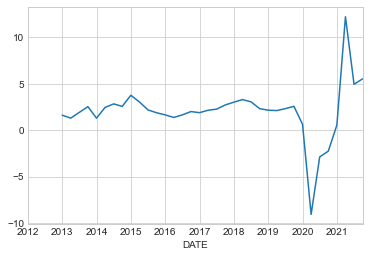

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

gdp['pct_yoy'].plot(ax=ax)

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

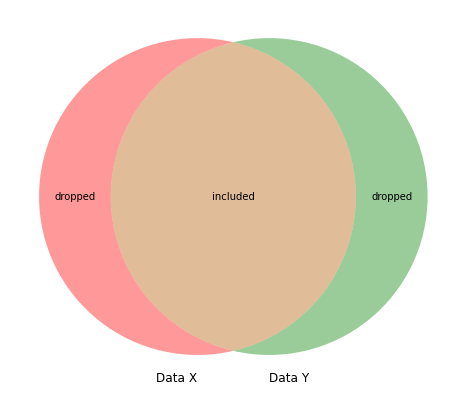

In [18]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

In [42]:
merge1 = gdp.merge(unemp, left_on = 'DATE', right_on = 'DATE')
merge1

,GDPC1,pct_yoy,UNRATE
DATE,,,
2012-01-01,16179.968,NaN,8.3
2012-04-01,16253.726,NaN,8.2
2012-07-01,16282.151,NaN,8.2
2012-10-01,16300.035,NaN,7.8
2013-01-01,16441.485,1.616301,8.0
2013-04-01,16464.402,1.296170,7.6
2013-07-01,16594.743,1.919845,7.3
2013-10-01,16712.760,2.532050,7.2
2014-01-01,16654.247,1.294056,6.6


Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.